In [2]:
### directory of data 
data_dir = "/Volumes/DATAVolume2/athenaruns/EccPassage/wb_data/"

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import athena_read as ar
from glob import glob
import OrbitAnalysisUtils as ou
from Constants import Constants
import pyshtools
import seaborn as sns
from astropy.io import ascii
from mpl_toolkits.axes_grid1 import ImageGrid
import deepdish as dd


c=Constants()

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.2
plt.rcParams['legend.labelspacing'] = 0.2
plt.rcParams['legend.handletextpad'] = 0.2
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

from importlib.metadata import version
from platform import python_version

print("python: ",python_version())

print("matplotlib: ",version('matplotlib'))
print("numpy: ",version('numpy'))
print("astropy:",version('astropy'))
print("pyshtools:",version('pyshtools'))
print("seaborn:",version('seaborn'))
print("deepdish:",version('deepdish'))
print("scipy:",version('scipy'))

Constants defined...
python:  3.8.3
matplotlib:  3.3.2
numpy:  1.19.2
astropy: 4.2.1
pyshtools: 4.7.1
seaborn: 0.11.1
deepdish: 0.3.6
scipy: 1.5.0


In [119]:
p53

r,rho,p,m
float64,float64,float64,float64
0.1,2.37,2.07612,0.1
0.10999000999000999,2.221932405167405,1.8644752109215503,0.10317351277806973
0.11998001998001999,2.096996534099057,1.6930432915550424,0.10675431765689108
0.12997002997003,1.9894475926795983,1.5508128138154795,0.11075741805874756
0.13996003996003997,1.8952746161287606,1.4304042293401726,0.11519623798374366
0.14995004995004996,1.8115968138682896,1.326705274767582,0.12008258877139018
0.15994005994005994,1.7362950197758409,1.2360738197483747,0.12542664386276575
0.16993006993006993,1.6677781536263343,1.1558523046795321,0.131236920810551
0.1799200799200799,1.604830425826673,1.084061176566957,0.13752027004389286


In [120]:
p43 = ascii.read(data_dir+"rp1.9/pa1e-8/hse_profile.dat.gz",names=["r","rho","p","m"])
p53 = ascii.read(data_dir+"g53/rp1.9/hse_profile.dat.gz",names=["r","rho","p","m"])

p43 = p43[p43['r']<=1.].copy()
p53 = p53[p53['r']<=0.9891108891108891].copy()

g43 = ascii.read("gyre/g135_mc01/fmodel2_Edist.txt")
g53 = ascii.read("gyre/g53_mc01/fmodel2_Edist.txt")

mp43 = ascii.read("gyre/g135_mc01/ModeProperties.txt")
mp53 = ascii.read("gyre/g53_mc01/ModeProperties.txt")

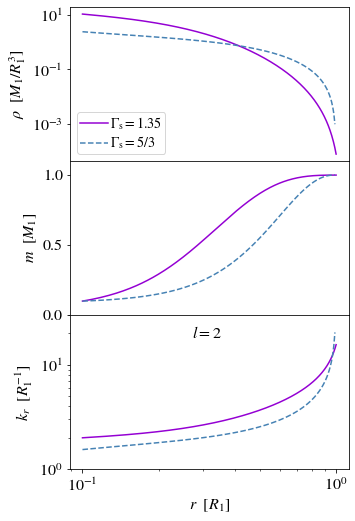

In [162]:
plt.figure(figsize=(5,8.5))


c53 = 'SteelBlue'
c43 = 'DarkViolet'

plt.subplot(311)
plt.plot(p43['r'],p43['rho'],color=c43,label=r'$\Gamma_{\rm s}=1.35$')
plt.plot(p53['r'],p53['rho'],color=c53,label=r'$\Gamma_{\rm s}=5/3$',ls='--')
plt.loglog()
plt.legend()
plt.xticks(visible=False)
#plt.grid()
plt.ylabel(r'$\rho \ \ [M_1/R_1^3]$')

plt.subplot(312)
plt.plot(p43['r'],p43['m'],color=c43)
plt.plot(p53['r'],p53['m'],color=c53,ls='--')
plt.semilogx()
plt.ylim(0,1.1)
plt.xticks(visible=False)
#plt.grid()
plt.ylabel(r'$m\ \ [M_1]$')

plt.subplot(313)
l=2
kh43 = (l*(l+1))/p43['r']**2
kh53 = (l*(l+1))/p53['r']**2
kr43 = mp43['omega'][0]/np.sqrt(1.35*p43['p']/p43['rho'])
kr53 = mp53['omega'][0]/np.sqrt(5/3.*p53['p']/p53['rho'])
plt.plot(p43['r'],kr43, color=c43,label='$k_r$',ls='-')
plt.plot(p53['r'],kr53 ,color=c53,ls='--')
plt.loglog()
plt.xlabel(r'$r\ \ [R_1]$')
plt.ylabel(r'$k_r\ \ [R_1^{-1}]$')
plt.annotate("$l=2$",(0.27,18))
plt.ylim(1,30)
#plt.legend()

plt.subplots_adjust(hspace=0)
plt.savefig("prece_figures/structures.pdf",bbox_inches='tight')

In [26]:
def divV_midplane(d):
    divV = ( d['gx1v']**(-2) *  np.gradient(d['gx1v']**2 * d['vel1'],axis=2)/np.gradient(d['gx1v'],axis=2) +
         1/(d['gx1v']*np.sin(d['gx2v'])) *  np.gradient(d['vel3'],axis=0)/np.gradient(d['gx3v'],axis=0) )
    return divV

reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00045.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 0.4900062939453136
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00048.athdf


<ipython-input-13-44c27e5b6ec7>:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1=ax[0,i].pcolormesh( d['x'][:,thind,:], d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im3=ax[2,i].pcolormesh(d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:47: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2=ax[1,i

 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 1.9900310894775401
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00051.athdf


<ipython-input-13-44c27e5b6ec7>:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1=ax[0,i].pcolormesh( d['x'][:,thind,:], d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im3=ax[2,i].pcolormesh(d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:47: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2=ax[1,i

 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 3.490021552734376
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00054.athdf


<ipython-input-13-44c27e5b6ec7>:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1=ax[0,i].pcolormesh( d['x'][:,thind,:], d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im3=ax[2,i].pcolormesh(d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:47: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2=ax[1,i

 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 4.989975776367189


<ipython-input-13-44c27e5b6ec7>:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1=ax[0,i].pcolormesh( d['x'][:,thind,:], d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im3=ax[2,i].pcolormesh(d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-13-44c27e5b6ec7>:47: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2=ax[1,i

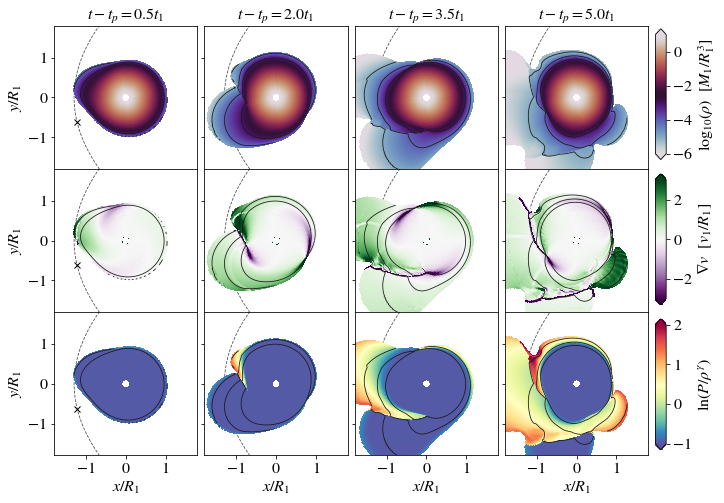

In [13]:
base_dir = data_dir + "rp1.3/"
filelist = [base_dir + "EccSP.out1.00045.athdf",
           base_dir + "EccSP.out1.00048.athdf",
           base_dir + "EccSP.out1.00051.athdf",
           base_dir + "EccSP.out1.00054.athdf"]
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
tperi = orb['time'][ np.argmin(orb['sep']) ]

thind = 0
mylevel = 1
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

fig,ax = plt.subplots(nrows=3,ncols=4,figsize=(10,7.9),sharey=True,sharex=True)

lim=1.8
r0thresh = 0.9

for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=3,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'hse_profile.dat')
    d['divV'] = divV_midplane(d)
    print("t-tperi=",d['Time']-tperi)

    
    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])


    
    
    ### DENSITY
    im1=ax[0,i].pcolormesh( d['x'][:,thind,:], d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, np.log10(d['rho'][:,thind,:]),np.nan ) ,
               cmap='twilight',vmin=-6,vmax=1,shading='nearest',rasterized=True
            )
    ax[0,i].set_title(r"$t-t_{p}=$"+str(np.round(d['Time']-tperi,1))+'$t_1$' ,fontdict={'fontsize':16}  )
      
    
    ### ENTROPY
    im3=ax[2,i].pcolormesh(d['x'][:,thind,:] , d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, np.log(d['press'][:,thind,:]/d['rho'][:,thind,:]**1.35),np.nan ),
               cmap='Spectral_r',vmin=-1,vmax=2,shading='nearest',rasterized=True
            )

    
    #### DIV V 
    im2=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, d['divV'][:,thind,:],np.nan ),
               cmap='PRGn',vmin=-3,vmax=3,shading='nearest',rasterized=True
            )
   
    
    
    # Contour, axes
    for j in range(3):
        ax[j,i].contour( ou.get_plot_array_midplane(d['x'][:,thind,:]) ,
               ou.get_plot_array_midplane( d['y'][:,thind,:] ),
               ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10(d['rho'][:,thind,:]),np.nan )),
               levels=[-5,-4,-3],colors='0.1',linestyles='solid',linewidths=0.8,
               )
        ax[j,i].plot(x2,y2,'kx')
        ax[j,i].plot(orb['x'],orb['y'],'--',color='0.3',lw=0.8,zorder=0)
        ax[j,i].set_aspect('equal')
        ax[j,i].set_xlim(-lim,lim)
        ax[j,i].set_ylim(-lim,lim)
    
ax[0,0].set_ylabel('$y / R_1$')
ax[1,0].set_ylabel('$y / R_1$')
ax[2,0].set_ylabel('$y / R_1$')
ax[2,0].set_xlabel('$x / R_1$')
ax[2,1].set_xlabel('$x / R_1$')
ax[2,2].set_xlabel('$x / R_1$')
ax[2,3].set_xlabel('$x / R_1$')

fig.subplots_adjust(hspace=0.0,wspace=0.05,right=0.95)

cax = fig.add_axes([0.96, 0.645, 0.015, 0.23])
cb=fig.colorbar(im1,cax=cax,label=r'$\log_{10} \left(\rho \right)$  $[M_1/R_1^3]$',extend='both')
cb.solids.set_edgecolor("face")

cax = fig.add_axes([0.96, 0.39, 0.015, 0.23])
cb=fig.colorbar(im2,cax=cax,label=r'$\nabla v$  $[v_1/R_1]$',extend='both')
cb.solids.set_edgecolor("face")

cax = fig.add_axes([0.96, 0.135, 0.015, 0.23])
cb=fig.colorbar(im3,cax=cax,label=r'$\ln \left(P/\rho^\gamma \right)$',extend='both')
cb.solids.set_edgecolor("face")

plt.savefig("prece_figures/ts_peri_rp13.pdf",bbox_inches='tight',dpi=300)

In [28]:
from scipy.interpolate import interpolate
import PericenterEnergyTransfer as pt

lt = pt.LinearTheory('gyre/g135_mc01/')
mp = ascii.read("gyre/g135_mc01/ModeProperties.txt")

lmax = 10

# calculate dE 
q = 0.1
r_p = 1.3
ecc = 0.987
omega_S = 0
num_l = lmax 

D_Array, Phi_Array, Nmax = lt.FindOrbit(ecc)

DeltaE_DeltaL_Array = np.array(list(map(lambda x: lt.FindDeltaE_l(q,r_p,ecc,omega_S,D_Array,Phi_Array,Nmax,int(x)), lt.l_Array[:num_l-1])))
DeltaE_Array = DeltaE_DeltaL_Array[:,0]
DeltaL_Array = DeltaE_DeltaL_Array[:,1] 

from astropy.table import Table
dEdL = Table( [np.arange(2,lmax+1),DeltaE_Array,DeltaL_Array],names=['l','dE','dL'])



dEdL


l,dE,dL
int64,float64,float64
2,0.0001864926719253607,0.00016718121816560727
3,4.720155498418946e-05,5.461882317384782e-05
4,1.0817620282918087e-05,1.3910894345330355e-05
5,2.479505688124587e-06,3.0901937244583793e-06
6,6.915377154550942e-07,8.071280637699156e-07
7,2.3063722978431425e-07,2.6267214236344193e-07
8,8.461936472978838e-08,9.481561752415408e-08
9,3.320662102947182e-08,3.6622821994698566e-08
10,1.376119799372382e-08,1.5000976558562505e-08


['/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00040.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00041.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00042.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00043.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00044.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00045.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00046.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00047.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00048.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00049.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00050.athdf', '/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00051

<ipython-input-31-ff7a268856e1>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dr['gx3v'][:,:,0],dr['gx2v'][:,:,0],dr['vel1'][:,:,0],vmin=-0.07,vmax=0.07,cmap=plt.cm.RdBu)


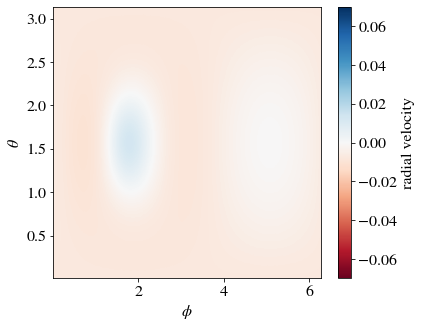

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00041.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


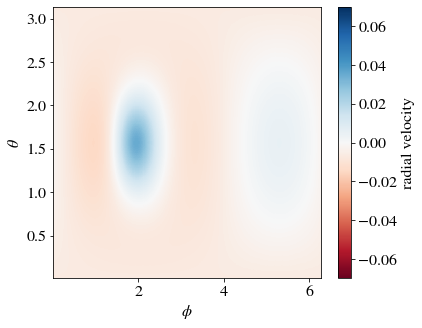

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00042.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


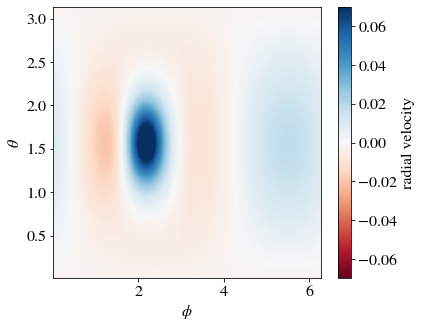

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00043.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


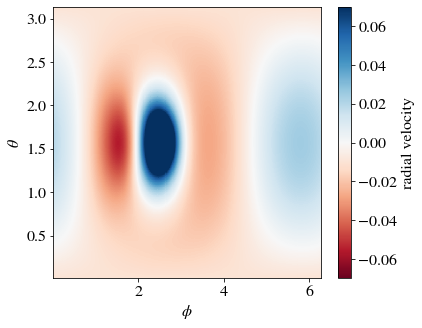

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00044.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


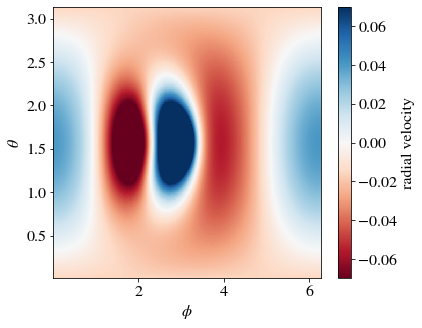

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00045.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


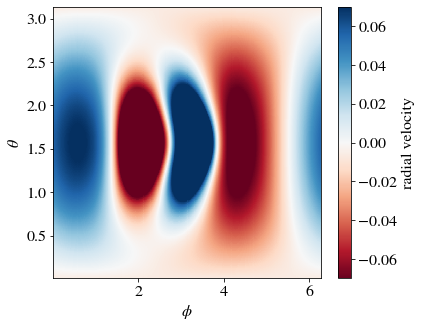

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


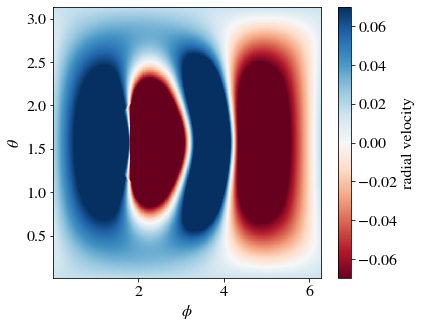

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00047.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


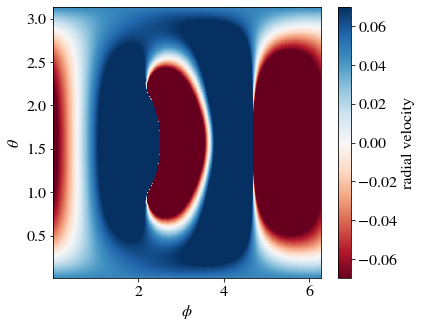

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00048.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


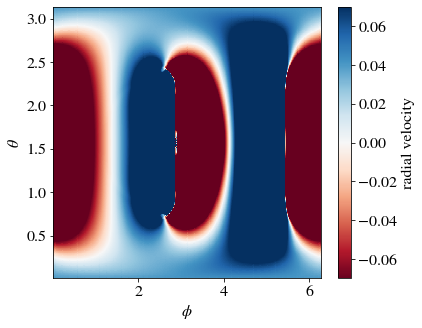

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00049.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


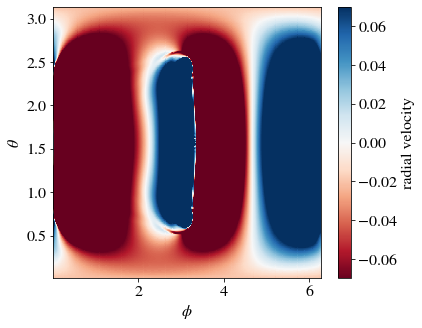

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00050.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


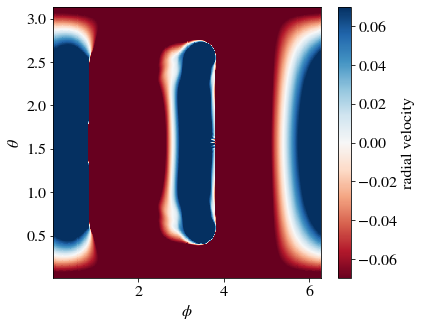

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00051.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


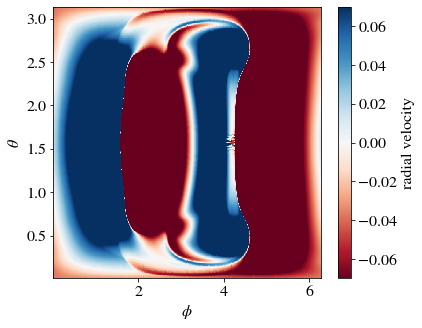

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00052.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


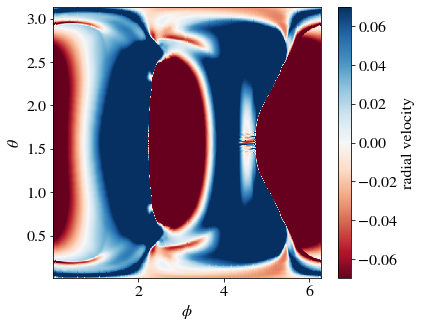

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00053.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


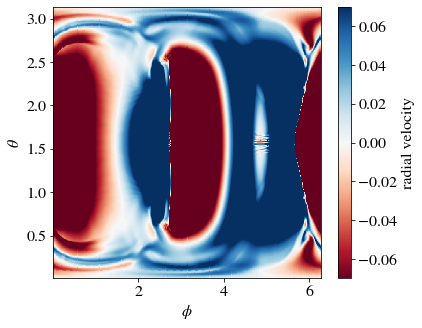

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00054.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


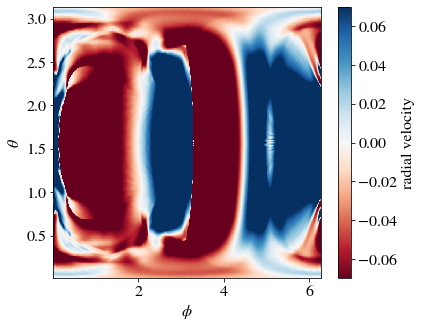

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00055.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


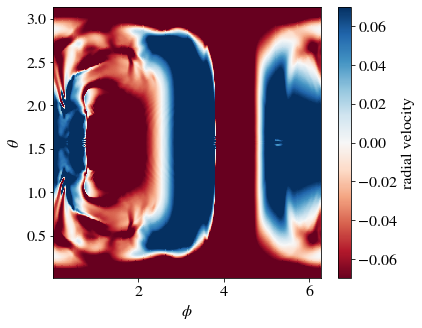

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00056.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


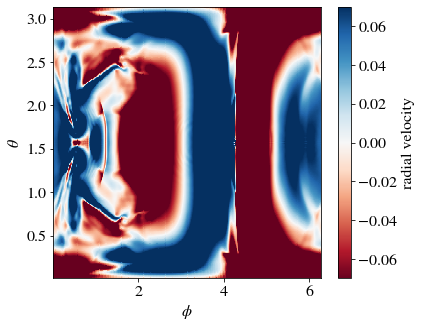

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00057.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


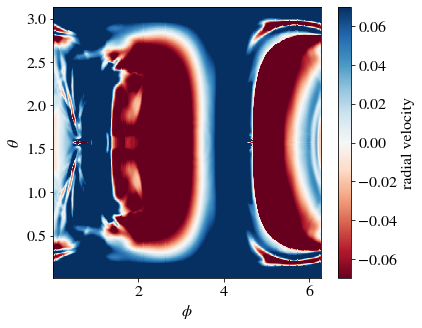

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00058.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


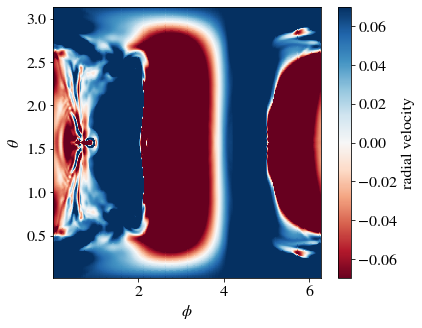

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00059.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


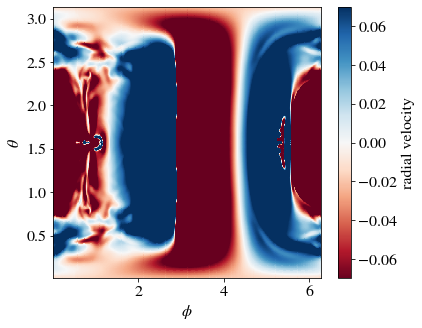

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00060.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


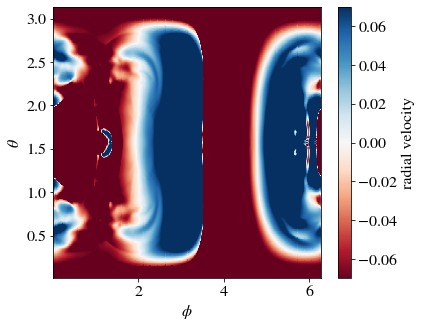

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00061.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


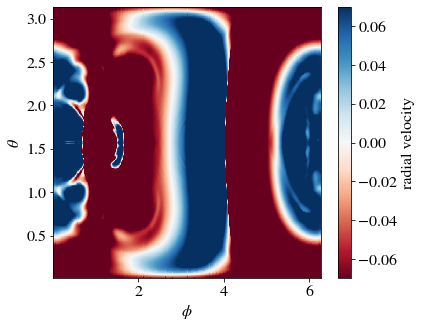

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00062.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


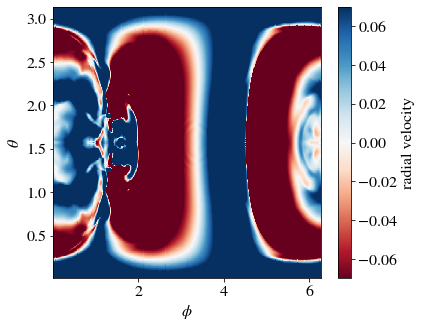

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00063.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


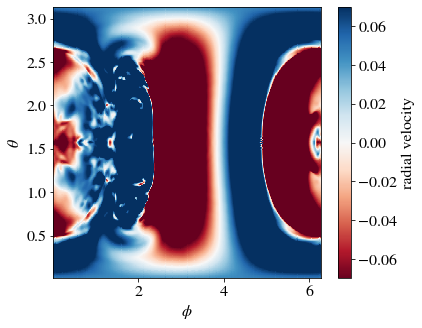

read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00064.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


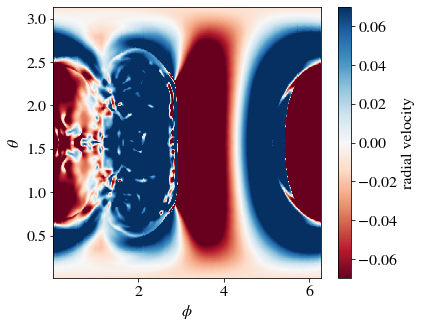

In [31]:
### NOTE: full snapshot data not availible to recompute this step, but leaving code for documention

base_dir = "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/"
filelist = sorted(glob(base_dir+"EccSP.out1.00[0-9][0-9][0-9].athdf"))[40:65:1]
print(filelist)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
tperi = orb['time'][ np.argmin(orb['sep']) ]


myr = 1.0

spectime = []
times = []

for i,myfile in enumerate(filelist):

    dblank = ar.athdf(myfile,quantities=[])
    x1slice = dblank['x1v'][ np.argmin(np.abs(dblank['x1v']-myr)) ]
    
    dr = ou.read_data(myfile,orb,gamma=1.35,get_cartesian=False,get_cartesian_vel=False,level=None,
                      x1_min=x1slice,x1_max=x1slice)
    gd=pyshtools.SHGrid.from_array(dr['vel1'][::2,::1,0].T)
    clm=gd.expand(lmax_calc=10)
    spectime.append(clm)
    times.append(dr['Time'])
    
    plt.pcolormesh(dr['gx3v'][:,:,0],dr['gx2v'][:,:,0],dr['vel1'][:,:,0],vmin=-0.07,vmax=0.07,cmap=plt.cm.RdBu)
    plt.colorbar(label=r'radial velocity')
    plt.xlabel(r'$\phi$')
    plt.ylabel(r'$\theta$')
    plt.show()

In [35]:
spectime_save = {}
spectime_save['spectime'] = spectime
spectime_save['times'] = times

dd.io.save('spectime_periapse_rp1.3.hdf5',spectime_save)

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


<ipython-input-36-9694a34b798e>:15: RuntimeWarning: divide by zero encountered in power
  plt.plot(clm.degrees(), 4*np.pi*clm.spectrum()[2]*(clm.degrees()/2)**(-5/3.) ,':',


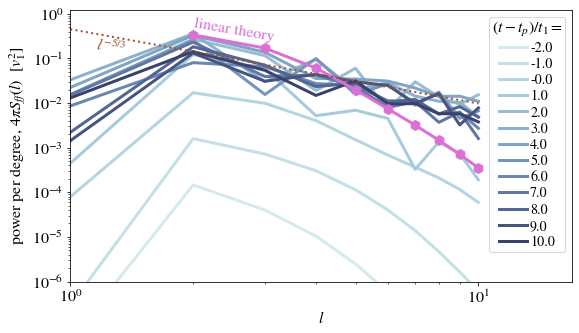

In [36]:
spectime_periapse = dd.io.load("spectime_periapse_rp1.3.hdf5")
spectime = spectime_periapse['spectime']
times = spectime_periapse['times']

plt.figure(figsize=(9,5) )
start = 0
skip=2
pal = sns.cubehelix_palette(len(spectime[start::skip]),rot=-0.2,gamma=0.7)
for i,clm in enumerate(spectime[start::skip]):
    plt.plot(clm.degrees()[1::],4*np.pi*clm.spectrum()[1::],lw=3,color=pal[i],
             label=str(np.round(times[start+i*skip]-tperi,1)) )
    

plt.plot(mp['l'],dEdL['dE']/mp['MMass'] ,'h-',label='',lw=3,markersize=10,color='Orchid')   
plt.plot(clm.degrees(), 4*np.pi*clm.spectrum()[2]*(clm.degrees()/2)**(-5/3.) ,':',
         color='Sienna',lw=2)  
plt.annotate("$l^{-5/3}$",(1.15,0.12),color='Sienna',rotation=-10)
plt.annotate("linear theory",(2.,0.25),color='Orchid',rotation=-10)
plt.yscale('log')
#plt.ylim(1.e-7,)

plt.ylabel(r"power per degree, $4\pi S_{ff}(l)$  $[v_1^2]$")
plt.xlabel(r"$l$")
plt.legend(loc=0,frameon=True,title=r'$(t-t_p)/t_1=$')

plt.loglog()
plt.xlim(1,17)
plt.ylim(1e-6,)
plt.savefig("prece_figures/spectrum_peri_rp13.pdf",bbox_inches='tight')

In [37]:
powertime = []

for i,t in enumerate(times):
    print(i,t)
    entry = [t]
    clm = spectime[i]
    for sff in clm.spectrum():
        entry.append(4*np.pi*sff)
    powertime.append(entry)

nl = list(clm.degrees() )
nl.insert(0,"time")
pt = Table(np.array(powertime),names=nl)

0 20.00001
1 20.500109
2 21.000002
3 21.50003
4 22.000097
5 22.500076
6 23.000097
7 23.500061
8 24.000101
9 24.500118
10 25.000072
11 25.500092
12 26.000061
13 26.500074
14 27.000046
15 27.500109
16 28.000053
17 28.500141
18 29.000042
19 29.500067
20 30.000015
21 30.500055
22 31.00014
23 31.50006
24 32.00012


reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00043.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00047.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00056.athdf
 ...file read, constructing arrays
 ...gamma= 1.35


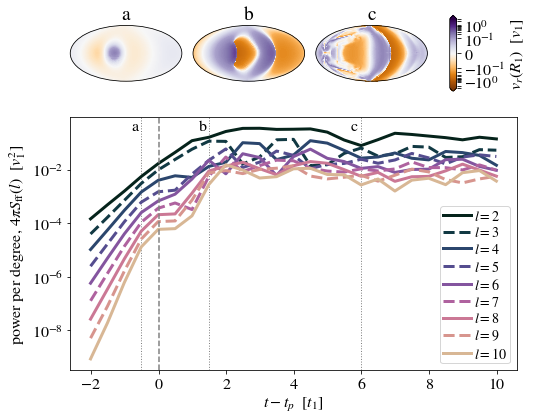

In [38]:
base_dir = data_dir+"rp1.3/"
myr = 1.0
dblank = ar.athdf(myfile,quantities=[])
x1slice = dblank['x1v'][ np.argmin(np.abs(dblank['x1v']-myr)) ]

filelist = [base_dir+"EccSP.out1.00043.athdf",base_dir+"EccSP.out1.00047.athdf",base_dir+"EccSP.out1.00056.athdf"] 
# sorted(glob(base_dir+"EccSP.out1.00[0-9][0-9][0-9].athdf"))[40:65:1]
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
tperi = orb['time'][ np.argmin(orb['sep']) ]


def plot_vr(dr):
    im=plt.pcolormesh(dr['gx3v'][:,:,0]-np.pi,-(dr['gx2v'][:,:,0]-np.pi/2),dr['vel1'][:,:,0],
               cmap='PuOr',shading='auto',norm=mpl.colors.SymLogNorm(linthresh=0.1,vmin=-3,vmax=3,base=10),rasterized=True)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    return im



plt.figure(figsize=(8,7))

axpow=plt.subplot2grid((3, 3), (1, 0), colspan=3,rowspan=2)
pal = sns.cubehelix_palette(len(clm.degrees()),rot=1,start=2,hue=1.0,light=0.9,dark=0.1,gamma=1.0,reverse=True)
#sns.palplot(pal)
for i,l in enumerate(clm.degrees()[2:]):
    if(i%2==0):
        ls = '-'
    else:
        ls = '--'
    plt.plot(pt['time']-tperi,pt[str(int(l))],color=pal[i],lw=3,ls=ls,label=r"$l=$"+str(int(l)) )
    

    
plt.yscale('log')
#plt.xlim(-3.5,9)
plt.legend(loc=0,frameon=True)

plt.xlabel(r'$t-t_p\ \ [t_{1}]$')
plt.ylabel(r'power per degree, $4\pi S_{\rm ff}(l)$  $[v_1^2]$')

plt.axvline(0.0,color='grey',ls='--')


dr = ou.read_data(filelist[0],orb,gamma=1.35,get_cartesian=False,get_cartesian_vel=False,level=None,
                      x1_min=x1slice,x1_max=x1slice)
ax1 = plt.subplot2grid((3, 3), (0,0),projection="aitoff")
im = plot_vr(dr)
axpow.axvline(dr['Time']-tperi,lw=1,ls=':',color='grey',zorder=0)
plt.title("a")
axpow.annotate("a",(dr['Time']-tperi-0.3,0.3))

dr = ou.read_data(filelist[1],orb,gamma=1.35,get_cartesian=False,get_cartesian_vel=False,level=None,
                      x1_min=x1slice,x1_max=x1slice)
ax2 = plt.subplot2grid((3, 3), (0,1),projection="aitoff")
im = plot_vr(dr)
axpow.axvline(dr['Time']-tperi,lw=1,ls=':',color='grey',zorder=0)
plt.title("b")
axpow.annotate("b",(dr['Time']-tperi-0.3,0.3))

dr = ou.read_data(filelist[2],orb,gamma=1.35,get_cartesian=False,get_cartesian_vel=False,level=None,
                      x1_min=x1slice,x1_max=x1slice)
ax3 = plt.subplot2grid((3, 3), (0,2),projection="aitoff")
im = plot_vr(dr)
axpow.axvline(dr['Time']-tperi,lw=1,ls=':',color='grey',zorder=0)
plt.title("c")
axpow.annotate("c",(dr['Time']-tperi-0.3,0.3))

plt.subplots_adjust(hspace=0,wspace=0.1)

cb=plt.colorbar(im,extend='both',shrink=0.6,ax=[ax1,ax2,ax3],label='$v_r(R_1)$  $[v_1]$',aspect=10 )
cb.solids.set_rasterized(True) 




#cb=plt.colorbar(label=r"radial velocity $(r=1)$",orientation='vertical')
#cb.solids.set_rasterized(True) 

plt.savefig("prece_figures/powertime_peri_rp13.pdf",bbox_inches='tight',dpi=300)

/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/
reading orbit file for binary simulation...
['/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00048.athdf', '/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00055.athdf']
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00048.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 0.9900095910644531
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00055.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 4.490083977661133
/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/
reading orbit file for binary simulation...
['/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00047.athdf', '/Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00053.athdf']
read_data...reading file 

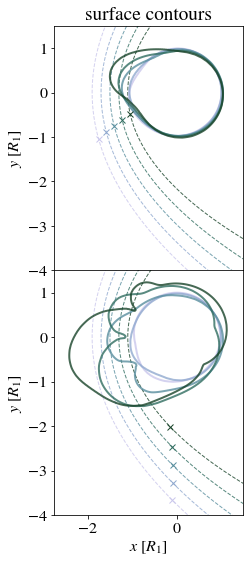

In [39]:
thind = 0
mylevel = 0


fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,9),sharey=True,sharex=True)
ax[0].set_title("surface contours")

lim=2.5
r0thresh = 0.5

bdl = [data_dir + "rp1.9/pa1e-8/",
       data_dir + "rp1.7/pa1e-8/",
       data_dir + "rp1.5/",
       data_dir + "rp1.3/",
       data_dir + "rp1.1/"]

myc=sns.cubehelix_palette(5,rot=0.5,start=1.8,light=0.8,dark=0.2)


filelist = [[bdl[0] + "EccSP.out1.00048.athdf",
             bdl[0] + "EccSP.out1.00055.athdf"],
            
            [bdl[1] + "EccSP.out1.00047.athdf",
             bdl[1] + "EccSP.out1.00053.athdf"],
            
            [bdl[2] + "EccSP.out1.00046.athdf",
             bdl[2] + "EccSP.out1.00051.athdf"],
            
            [bdl[3] + "EccSP.out1.00045.athdf",
             bdl[3] + "EccSP.out1.00049.athdf"],
            
            [bdl[4] + "EccSP.out1.00044.athdf",
             bdl[4] + "EccSP.out1.00047.athdf"]]

x2slicevalue=ou.get_midplane_theta(filelist[0][0],level=mylevel)

for j,base_dir in enumerate(bdl):
    print(base_dir)

    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]

    print(filelist[j])

    for i,myfile in enumerate(filelist[j]):
        d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                           x1_max=3,x2_min=x2slicevalue,x2_max=x2slicevalue,
                           get_energy=False,profile_file=base_dir+'hse_profile.dat')
        d['divV'] = divV_midplane(d)
        print("t-tperi=",d['Time']-tperi)


        x2,y2,z2 = ou.pos_secondary(orb,d['Time'])




        ### DENSITY
        ax[i].contour( ou.get_plot_array_midplane(d['x'][:,thind,:]) ,
                   ou.get_plot_array_midplane( d['y'][:,thind,:] ),
                   #ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10(d['rho'][:,thind,:]),np.nan )),
                   ou.get_plot_array_midplane(d['r0'][:,thind,:]),
                    levels=[0.9],colors=[myc[j]],linestyles='solid',linewidths=2,alpha=0.8)
        #ax[i].set_title(r"$t-t_{\rm p}=$"+str(np.round(d['Time']-tperi,1)) ,fontdict={'fontsize':16}  )

        ax[i].plot(x2,y2,'x',color=myc[j],lw=2)
        ax[i].plot(orb['x'],orb['y'],'--',color=myc[j],lw=1,zorder=0,alpha=0.8)
        ax[i].set_aspect('equal')
        ax[i].set_xlim(-2.75,1.5)
        ax[i].set_ylim(-4,1.5)



ax[0].set_ylabel('$y \  [R_1]$')
ax[0].set_xlabel('$x \ [R_1]$')
ax[1].set_xlabel('$x \ [R_1]$')
ax[1].set_ylabel('$y \  [R_1]$')
fig.subplots_adjust(hspace=0.0,wspace=0.0)

plt.savefig("prece_figures/comparative_contours.pdf",bbox_inches='tight',dpi=300)

In [35]:
mp=ascii.read("gyre/g135_mc01/ModeProperties.txt")
wl2 = mp['omega'][0]
gamma_ad = 1.35
def kr0(r_initial):
    cs0 = np.interp(r_initial,p['r'], np.sqrt(gamma_ad*p['p']/p['rho']) )
    return wl2/cs0

In [41]:
bdl = [data_dir+"rp1.9/pa1e-8/",
      data_dir+"rp1.7/pa1e-8/",
      data_dir+"rp1.5/",
      data_dir+"rp1.3/",
      data_dir+"rp1.1/"]
fl = ["EccSP.out1.00046.athdf",
      "EccSP.out1.00046.athdf",
      "EccSP.out1.00045.athdf",
      "EccSP.out1.00044.athdf",
      "EccSP.out1.00044.athdf"]
rpl = [1.9,1.7,1.5,1.3,1.1]

mp=ascii.read("gyre/g135_mc01/ModeProperties.txt")
wl2 = mp['omega'][0]
gamma_ad = 1.35

p = ascii.read(bdl[0]+"hse_profile.dat",names=["r","rho","p","m"])


def kr0(r_initial):
    cs0 = np.interp(r_initial,p['r'], np.sqrt(gamma_ad*p['p']/p['rho']) )
    return wl2/cs0

tl = []
yl = []
bl = []

ylr = []
blr = []

ylbc = []
blbc = []

ylcs = []
blcs = []

for i,base_dir in enumerate(bdl):
    mylevel=0
    myfile = base_dir + fl[i]
    orb=ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=6,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=True,profile_file=base_dir+'hse_profile.dat')
    
    print(d['Time']-tperi)
    tl.append(d['Time'])

    sel = (d['r0']>0.99) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  #sel = d['r0']>0.5 # select material that is mostly stellar

    # xi_r
    y,b = np.histogram( (d['gx1v'][sel]-d['r1'][sel]), weights=(d['dvol']*d['rho'])[sel].flatten(), bins=np.linspace(-0.25,0.5,90) )
    ylr.append(y)
    blr.append(b[:-1]) 
    
    # k_r xi_r 
    y,b = np.histogram( np.log10(kr0(d['r1'][sel])*np.abs(d['gx1v'][sel]-d['r1'][sel])), weights=(d['dvol']*d['rho'])[sel].flatten(), bins=np.linspace(-3,1,41) )
    ylbc.append(y)
    blbc.append(b[:-1]) 
    

drh = {}
drh['time'] = np.array(tl)
drh['dm'] = np.array(ylr)
drh['dr'] = np.array(blr)

dbch = {}
dbch['time'] = np.array(tl)
dbch['dm'] = np.array(ylbc)
dbch['kxi'] = np.array(blbc)

# SAVE
dd.io.save("dr_histograms_peri.hdf5",drh)
dd.io.save("dkx_histograms_peri.hdf5",dbch)


reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
-0.009957984008789111


<ipython-input-41-52c41ec6d946>:57: RuntimeWarning: divide by zero encountered in log10
  y,b = np.histogram( np.log10(kr0(d['r1'][sel])*np.abs(d['gx1v'][sel]-d['r1'][sel])), weights=(d['dvol']*d['rho'])[sel].flatten(), bins=np.linspace(-3,1,41) )


reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
0.3100034600830064
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.5/EccSP.out1.00045.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
0.14002160705566524
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00044.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
-0.009972725219725476
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.1/EccSP.out1.00044.athdf
 ...file read, constructing ar

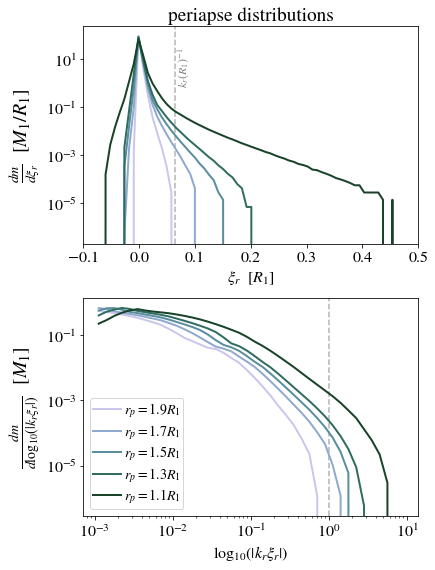

In [42]:
myc=sns.cubehelix_palette(5,rot=0.5,start=1.8,light=0.8,dark=0.2)

plt.figure(figsize=(6,9))

drh = dd.io.load("dr_histograms_peri.hdf5")
dkxh = dd.io.load("dkx_histograms_peri.hdf5")
deltar = drh['dr'][0][1]-drh['dr'][0][0]
deltakx = dkxh['kxi'][0][1]-dkxh['kxi'][0][0]

rpl = [1.9,1.7,1.5,1.3,1.1]

plt.subplot(211)
plt.title("periapse distributions")
for i,rp in enumerate(rpl):
    plt.plot( drh['dr'][i]+deltar/2 ,drh['dm'][i]/deltar,'-',color=myc[i],lw=2)
    
plt.semilogy()
#plt.loglog()
plt.xlim(-0.1,0.5)
plt.xlabel(r"$\xi_r$  $[R_1]$")
plt.ylabel(r"$\frac{dm}{d \xi_r}$  $[M_1/R_1]$",fontsize=20)

plt.axvline(1/kr0(1.0),ls='--',color='0.7',zorder=0)
plt.annotate(r"$k_r(R_1)^{-1}$",(0.065,1),color='grey',rotation=90,fontsize=12)
#plt.grid()


plt.subplot(212)
for i,rp in enumerate(rpl):
    plt.plot( 10**(dkxh['kxi'][i]+deltakx/2) ,dkxh['dm'][i]/deltakx,'-',color=myc[i],lw=2,
            label=r"$r_p=$"+str(rpl[i])+r"$R_1$")
    
#plt.semilogy()
plt.loglog()
#plt.xlim(0.01,10)
plt.xlabel(r"$\log_{10}\left( |k_r \xi_r| \right)$")
plt.ylabel(r"$\frac{dm}{d \log_{10} \left( |k_r \xi_r| \right) }$  $[M_1]$",fontsize=20)

plt.axvline(1,ls='--',color='0.7',zorder=0)
#plt.grid()
plt.legend()


plt.subplots_adjust(hspace=0.25)

plt.savefig("prece_figures/kx_hist.pdf",bbox_inches='tight')

reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00064.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 9.990048255615235


<ipython-input-43-847096349052>:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imrho=ax[0,i].pcolormesh( d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imdiv=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imvph

read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00114.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 34.98993381469727
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00154.athdf


<ipython-input-43-847096349052>:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imrho=ax[0,i].pcolormesh( d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imdiv=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imvph

 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 54.990013923339845
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00204.athdf


<ipython-input-43-847096349052>:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imrho=ax[0,i].pcolormesh( d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imdiv=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imvph

 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 79.98998340576172


<ipython-input-43-847096349052>:33: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imrho=ax[0,i].pcolormesh( d['x'][:,thind,:] , d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imdiv=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
<ipython-input-43-847096349052>:50: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  imvph

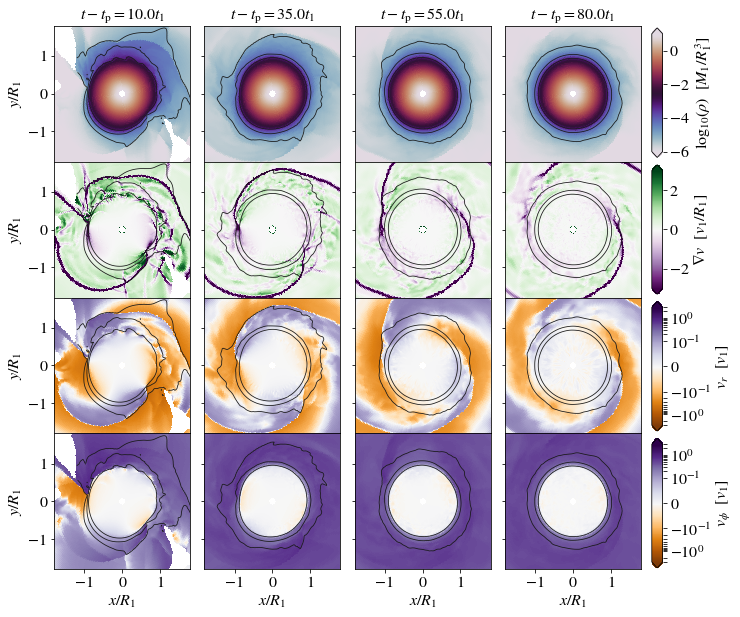

In [43]:
base_dir = data_dir + "rp1.3/"
#filelist = sorted(glob(base_dir+"EccSP.out1.00[0-9][0-9]0.athdf"))
filelist = [base_dir + "EccSP.out1.00064.athdf",
           base_dir + "EccSP.out1.00114.athdf",
           base_dir + "EccSP.out1.00154.athdf",
           base_dir + "EccSP.out1.00204.athdf"]
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
tperi = orb['time'][ np.argmin(orb['sep']) ]

thind = 0
mylevel = 0
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(10,10),sharey=True,sharex=True)

lim=1.8
r0thresh = 0.9

for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=3,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'hse_profile.dat')
    d['divV'] = divV_midplane(d)
    print("t-tperi=",d['Time']-tperi)

    
    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])


    
    
    ### DENSITY
    imrho=ax[0,i].pcolormesh( d['x'][:,thind,:] , d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, np.log10(d['rho'][:,thind,:]),np.nan ),
               cmap='twilight',vmin=-6,vmax=1,shading='auto',rasterized=True
            )
    ax[0,i].set_title(r"$t-t_{\rm p}=$"+str(np.round(d['Time']-tperi,1))+"$t_1$" ,fontdict={'fontsize':16}  )
    
    
        
    #### DIV V 
    imdiv=ax[1,i].pcolormesh( d['x'][:,thind,:] ,d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, d['divV'][:,thind,:],np.nan ),
               cmap='PRGn',vmin=-3,vmax=3,shading='nearest',rasterized=True
            )
   
    
    ### Vphi
    vlim=0.3
    imvphi=ax[3,i].pcolormesh(d['x'][:,thind,:], d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, (d['vel3'])[:,thind,:] ,np.nan ),
               cmap='PuOr',shading='auto',norm=mpl.colors.SymLogNorm(linthresh=0.1,vmin=-3,vmax=3,base=10),rasterized=True
            )
    
     
    
    #### v_r
    imvr=ax[2,i].pcolormesh(d['x'][:,thind,:] ,d['y'][:,thind,:] ,
               np.where(d['r0'][:,thind,:]>r0thresh, d['vel1'][:,thind,:],np.nan ),
               cmap='PuOr',shading='auto',norm=mpl.colors.SymLogNorm(linthresh=0.1,vmin=-3,vmax=3,base=10),rasterized=True
            )
    
   
    
    
    # Contour, axes
    for j in range(4):
        ax[j,i].contour( ou.get_plot_array_midplane(d['x'][:,thind,:]) ,
               ou.get_plot_array_midplane( d['y'][:,thind,:] ),
               ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10(d['rho'][:,thind,:]),np.nan )),
               levels=[-5,-4,-3],colors='0.1',linestyles='solid',linewidths=0.8,
               )
        ax[j,i].plot(x2,y2,'kx')
        ax[j,i].plot(orb['x'],orb['y'],'--',color='0.3',lw=0.8,zorder=0)
        ax[j,i].set_aspect('equal')
        ax[j,i].set_xlim(-lim,lim)
        ax[j,i].set_ylim(-lim,lim)
        
    
ax[0,0].set_ylabel('$y / R_1$')
ax[1,0].set_ylabel('$y / R_1$')
ax[2,0].set_ylabel('$y / R_1$')
ax[3,0].set_ylabel('$y / R_1$')
ax[3,0].set_xlabel('$x / R_1$')
ax[3,1].set_xlabel('$x / R_1$')
ax[3,2].set_xlabel('$x / R_1$')
ax[3,3].set_xlabel('$x / R_1$')

fig.subplots_adjust(hspace=0.0,wspace=0.05,right=0.95)

cax = fig.add_axes([0.96, 0.697, 0.015, 0.18])
cb=fig.colorbar(imrho,cax=cax,label=r'$\log_{10} \left(\rho \right)$  $[M_1/R_1^3]$',extend='both')
cb.solids.set_edgecolor("face")

cax = fig.add_axes([0.96, 0.507, 0.015, 0.18])
cb=fig.colorbar(imdiv,cax=cax,label=r'$\nabla v$  $[v_1/R_1]$',extend='both')
cb.solids.set_edgecolor("face")

cax = fig.add_axes([0.96, 0.127, 0.015, 0.18])
cb=fig.colorbar(imvphi,cax=cax,label=r'$v_\phi$  $[v_1]$',extend='both')
cb.solids.set_edgecolor("face")

cax = fig.add_axes([0.96, 0.317, 0.015, 0.18])
cb=fig.colorbar(imvr,cax=cax,label=r'$v_r$  $[v_1]$',extend='both')
cb.solids.set_edgecolor("face")


plt.savefig("prece_figures/ts_diss_rp13.pdf",bbox_inches='tight',dpi=300)

read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 82.99006732910156
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 82.99006732910156


<ipython-input-44-bbfb254b32bf>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221)
<ipython-input-44-bbfb254b32bf>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(222)
<ipython-input-44-bbfb254b32bf>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.5/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 82.99004444091797


<ipython-input-44-bbfb254b32bf>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221)
<ipython-input-44-bbfb254b32bf>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(222)
<ipython-input-44-bbfb254b32bf>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 82.9900749584961


<ipython-input-44-bbfb254b32bf>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221)
<ipython-input-44-bbfb254b32bf>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(222)
<ipython-input-44-bbfb254b32bf>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.1/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
t-tperi= 82.98996051757813


<ipython-input-44-bbfb254b32bf>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(221)
<ipython-input-44-bbfb254b32bf>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(222)
<ipython-input-44-bbfb254b32bf>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

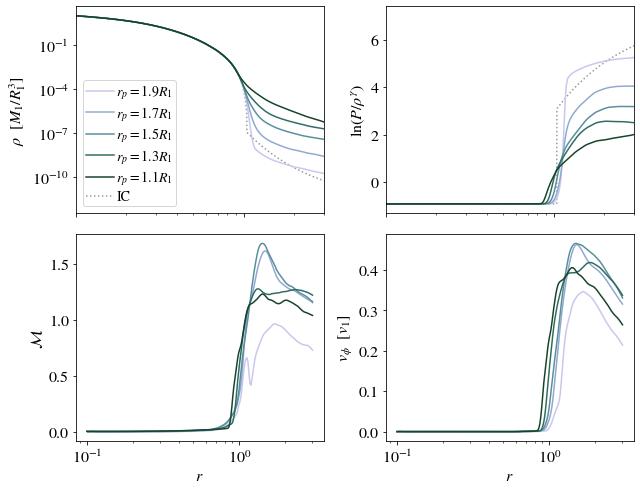

In [44]:
rpl = [1.9,1.7,1.5,1.3,1.1]
pal = sns.cubehelix_palette(5,rot=0.5,start=1.8,light=0.8,dark=0.2)

filelist = [data_dir + "rp1.9/pa1e-8/EccSP.out1.00210.athdf",
           data_dir + "rp1.7/pa1e-8/EccSP.out1.00210.athdf",
           data_dir + "rp1.5/EccSP.out1.00210.athdf",
           data_dir + "rp1.3/EccSP.out1.00210.athdf",
           data_dir + "rp1.1/EccSP.out1.00210.athdf"]

plt.figure(figsize=(10,8))
mylevel = 0

r0thresh = 0.9
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)
mycm = plt.cm.twilight
for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=3,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'hse_profile.dat')
    print("t-tperi=",d['Time']-tperi)
    #x2,y2,z2 = ou.pos_secondary(orb,d['Time'])
    #Hp = -np.gradient(d['x1v'])/np.gradient(np.average(np.log(d['press']),axis=(0,1),weights=d['r0']*d['rho']*d['dvol']) )

    
    plt.subplot(221)
    #plt.plot(p['r'],p['rho'],label=r'IC $\rho$')
    #plt.plot(d['x1v'],np.average(d['rho']*d['r0'],axis=(0,1)),label=r'$r_0 \rho$')
    plt.plot(d['x1v'],
             np.average(d['rho'],axis=(0,1)),
             label=r'$r_p=$'+str(rpl[i])+"$R_1$",color=pal[i] )
    plt.loglog()
    plt.legend()
    plt.ylabel(r'$\rho$  $[M_1/R_1^3]$')
    #plt.xlabel(r'$r$')
    plt.xticks(visible=False)
    plt.xlim(0.1,3)
    

    plt.subplot(222)
    #plt.plot(p['r'],np.log(p['p']/p['rho']**1.35),label=r'IC $\ln(P/\rho^\gamma)$')
    plt.plot(d['x1v'],
             np.average(np.log(d['press']/d['rho']**1.35),axis=(0,1),weights=d['r0']*d['rho']*d['dvol']),color=pal[i])
    plt.semilogx()
    #plt.legend()
    plt.ylabel(r'$\ln(P/\rho^\gamma)$')
    #plt.xlabel(r'$r$')
    plt.xticks(visible=False)
    plt.xlim(0.1,3)


    plt.subplot(223)
    #plt.plot(d['x1v'],
    #         np.average(0.5*(d['vel1']**2 + d['vel2']**2 + d['vel3']**2),axis=(0,1),weights=d['r0']*d['rho']*d['dvol']),color=pal[i])
    plt.plot(d['x1v'],
             np.average( np.sqrt((d['vel1']**2 + d['vel2']**2 + d['vel3']**2)/(1.35*d['press']/d['rho'])),axis=(0,1),weights=d['r0']*d['rho']*d['dvol']),color=pal[i])
    #plt.plot(d['x1v'],
    #         np.average( np.sqrt(d['vel1']**2/(1.35*d['press']/d['rho'])),axis=(0,1),weights=d['r0']*d['rho']*d['dvol']),color=pal[i])
    plt.semilogx()
    plt.ylabel(r'$\cal M$')
    plt.xlabel(r'$r$')


    plt.subplot(224)
    plt.plot(d['x1v'],np.average(d['vel3'],axis=(0,1),weights=d['r0']*d['rho']*d['dvol']),color=pal[i])
    plt.semilogx()
    plt.ylabel(r'$v_\phi$  $[v_1]$')
    plt.xlabel(r'$r$')


p = ascii.read("/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.9/pa1e-8/hse_profile.dat",names=['r','rho','p','m'])
plt.subplot(221)
plt.plot(p['r'],p['rho'],label=r'IC',color='0.6',ls=':',zorder=0)
plt.legend()
plt.subplot(222)
plt.plot(p['r'],np.log(p['p']/p['rho']**1.35),color='0.6',ls=':',zorder=0)




plt.subplots_adjust(hspace=0.1,wspace=0.25)

plt.savefig("prece_figures/final_1d_prof.pdf",bbox_inches='tight')

In [ ]:
# Out of plane views

# Change to data_dir to run from downloaded dataset
orb = ou.read_trackfile("/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/pm_trackfile.dat")
myfile = "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00210.athdf"


mylevel = 0

mycm = plt.cm.twilight
d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                   x1_max=12,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                   get_energy=False,profile_file=base_dir+'hse_profile.dat')
print("t-tperi=",d['Time']-tperi)

reading orbit file for binary simulation...
read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/EccSP.out1.00210.athdf


<ipython-input-36-41bf2df47ec8>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],


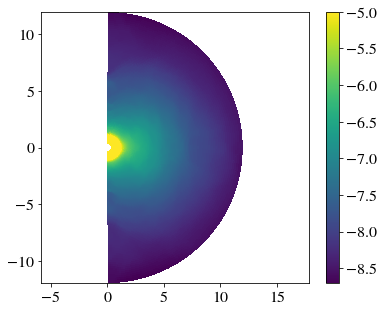

In [36]:
plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],
               d['z'][0,:,:],
               np.log10(np.average(d['rho'],axis=0)),vmax=-5 )


plt.axis('equal')
plt.xlim(0,12)
plt.ylim(-12,12)
plt.colorbar()

<ipython-input-34-a427e65522da>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],


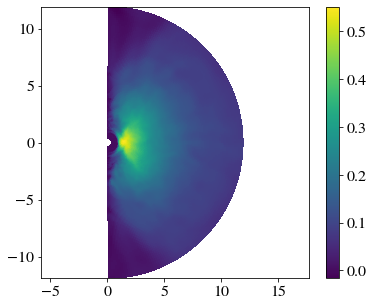

In [34]:
plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],
               d['z'][0,:,:],
               (np.average(d['vel3'],axis=0,weights=d['rho'])) )


#plt.xlim(0,3)
#plt.ylim(-3,3)
plt.axis('equal')
plt.colorbar()

<ipython-input-37-15a48edf8e0d>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],


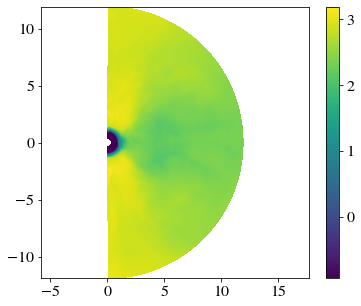

In [37]:
plt.pcolormesh(np.sqrt(d['x']**2 + d['y']**2)[0,:,:],
               d['z'][0,:,:],
               np.average(np.log(d['press']/d['rho']**1.35),axis=0,weights=d['rho'])) 


#plt.xlim(0,3)
#plt.ylim(-3,3)
plt.axis('equal')
plt.colorbar()

In [45]:
mp = ascii.read("gyre/g135_mc01/ModeProperties.txt")
p = ascii.read(data_dir + "rp1.9/pa1e-8/hse_profile.dat",names=['r','rho','p','m'])

wl2 = mp['omega'][0]
gamma_ad = 1.35
def kr0(r_initial):
    cs0 = np.interp(r_initial,p['r'], np.sqrt(gamma_ad*p['p']/p['rho']) )
    return wl2/cs0



bdl = [data_dir + "rp1.9/pa1e-8/",
       data_dir + "rp1.7/pa1e-8/",
       data_dir + "rp1.5/",
       data_dir + "rp1.3/",
       data_dir + "rp1.1/"]
fl = ["EccSP.out1.00046.athdf",
      "EccSP.out1.00046.athdf",
      "EccSP.out1.00045.athdf",
      "EccSP.out1.00044.athdf",
      "EccSP.out1.00044.athdf"]



rpl = [1.9,1.7,1.5,1.3,1.1]


mkx = []
mkxsurf = []

for i,base_dir in enumerate(bdl):
    mylevel=0
    myfile = base_dir + fl[i]
    orb=ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=6,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=True,profile_file=base_dir+'hse_profile.dat')
    
    print(d['Time']-tperi)
    sel = (d['r0']>0.9) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  #sel = d['r0']>0.5 # select material that is mostly stellar
    
       
    kx = kr0(d['r1'])*np.abs(d['gx1v']-d['r1'])
    mkxg1 = np.sum((d['r0']*d['rho']*d['dvol'])[sel & (kx>1)] )
    mkx.append([mkxg1])
    
    kxsurf = kr0(1.0)*np.abs(d['gx1v']-d['r1'])
    mkxsurfg1 = np.sum((d['r0']*d['rho']*d['dvol'])[sel & (kxsurf>1)] )
    mkxsurf.append([mkxsurfg1])
    

mkx = np.array(mkx)
mkxsurf = np.array(mkxsurf)

reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
-0.009957984008789111
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
0.3100034600830064
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.5/EccSP.out1.00045.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
...getting energy arrays...
0.14002160705566524
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00044.athdf
 ...file read, construc

In [46]:
mp = ascii.read("gyre/g135_mc01/ModeProperties.txt")
bdl = [data_dir + "rp1.9/pa1e-8/",
       data_dir + "rp1.7/pa1e-8/",
       data_dir + "rp1.5/",
       data_dir + "rp1.3/",
       data_dir + "rp1.1/"]
rpl = [1.9,1.7,1.5,1.3,1.1]

matm_S = []
matm_M01 = []
matm_M1 = []

#matm_S_r0 = []
#gamma_analytic = []
#gamma_analytic_r0 = []

gamma_ad = 1.35

for i,base_dir in enumerate(bdl):
    mylevel=0
    myfile = base_dir + "EccSP.out1.00210.athdf"
    orb=ou.read_trackfile(base_dir+"pm_trackfile.dat")
    d = ou.read_data(myfile,orb,gamma=1.35,level=mylevel,
                       x1_max=6,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'hse_profile.dat')

    
    lnS = np.log(d['press']/d['rho']**1.35)
    selS = (lnS>-0.8) & (d['r0']>0.9) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  
    matm = np.sum((d['r0']*d['rho']*d['dvol'])[selS] ) 
    matm_S.append(matm)
    
    vel = np.sqrt(d['vel1']**2 + d['vel2']**2 + d['vel3']**2) 
    cs = np.sqrt(gamma_ad*d['press']/d['rho'])
    selM = (vel/cs>0.1) & (d['r0']>0.9) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  
    matm = np.sum((d['r0']*d['rho']*d['dvol'])[selM] ) 
    matm_M01.append(matm)
    selM = (vel/cs>1.0) & (d['r0']>0.9) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  
    matm = np.sum((d['r0']*d['rho']*d['dvol'])[selM] ) 
    matm_M1.append(matm)
    
    
matm_S = np.array(matm_S)
matm_M01 = np.array(matm_M01)
matm_M1 = np.array(matm_M1)


reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.9/pa1e-8/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.7/pa1e-8/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.5/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacleod/DATA/athenaruns/wb_data/rp1.3/EccSP.out1.00210.athdf
 ...file read, constructing arrays
 ...gamma= 1.35
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file /Users/morganmacl

In [47]:
dEdL_lin=ascii.read("gyre/g135_mc01/dEdL.dat")

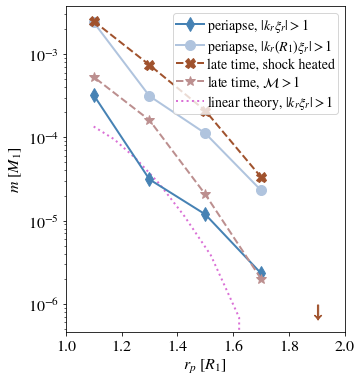

In [48]:
q=0.1 

plt.figure(figsize=(5,6))
plt.plot(rpl[1:],mkx[1:],'d-',label=r'periapse, $|k_r \xi_r| > 1$',lw=2,color='SteelBlue',markersize=10)
plt.plot(rpl[1:],mkxsurf[1:],'o-',label=r'periapse, $|k_r(R_1) \xi_r| > 1$',lw=2,color='LightSteelBlue',markersize=10)

plt.plot(rpl[1:],matm_S[1:],'X--',label=r'late time, shock heated',lw=2,color='Sienna',markersize=10)
plt.plot(rpl[0],matm_S[0],'x',label='',lw=2,color='Sienna',markersize=15, marker=r'$\downarrow$')

plt.plot(rpl[1:],matm_M1[1:],'*--',color='RosyBrown',label=r'late time, $\cal M >1$',lw=2,markersize=10)


plt.plot(dEdL_lin['rp_o_rt']*q**(1/3),dEdL_lin['mkx'],':',color='orchid',markersize=6,label=r'linear theory, $|k_r \xi_r| > 1$',zorder=0,lw=2)
#plt.annotate(r'linear theory, $|k_r \xi_r| > 1$',(1.1,6.e-6),rotation=-40,color='Orchid',fontsize=14)


plt.legend(loc='upper right')
plt.semilogy()
#plt.grid()
#plt.ylim(3.e-7,1.e-2)
plt.xlim(1,2)

plt.xlabel(r'$r_p \ [R_1]$')
plt.ylabel(r'$m \ [M_1]$')


plt.savefig("prece_figures/atm_masses.pdf",bbox_inches='tight')

In [ ]:
### FULL DATA NOT AVAILIBLE FOR THIS STEP


bdl = ["/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.1/",
      "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.3/",
      "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.5/",
      "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.7/pa1e-8/",
      "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.9/pa1e-8/"]

for base_dir in bdl:
    #base_dir = "/Volumes/DATAVolume2/athenaruns/EccPassage/q01/lagr/rp1.7/"
    filelist = sorted(glob(base_dir+"EccSP.out1.00[0-9][0-9][0-9].athdf"))[40::1]
    print(filelist)
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]


    rlist = [1.0]
    for myr in rlist:
        spectime = []
        times = []

        for i,myfile in enumerate(filelist):

            dblank = ar.athdf(myfile,quantities=[])
            x1slice = dblank['x1v'][ np.argmin(np.abs(dblank['x1v']-myr)) ]

            dr = ou.read_data(myfile,orb,gamma=1.35,get_cartesian=False,get_cartesian_vel=False,level=None,
                              x1_min=x1slice,x1_max=x1slice)
            gd=pyshtools.SHGrid.from_array(dr['vel1'][::2,::1,0].T)
            clm=gd.expand(lmax_calc=10)
            spectime.append(clm)
            times.append(dr['Time'])

            #plt.pcolormesh(dr['gx3v'][:,:,0],dr['gx2v'][:,:,0],dr['vel1'][:,:,0],vmin=-0.07,vmax=0.07,cmap=plt.cm.RdBu)
            #plt.colorbar(label=r'radial velocity')
            #plt.xlabel(r'$\phi$')
            #plt.ylabel(r'$\theta$')
            #plt.show()

        datadict = {'times':times,'spectime':spectime}
        dd.io.save(base_dir+"spectime_"+str(myr)+".hdf5",datadict)

In [49]:
def get_pt(spectime_data):

    times = spectime_data['times']
    spectime = spectime_data['spectime']

    powertime = []

    for i,t in enumerate(times):
        #print(i,t)
        entry = [t]
        clm = spectime[i]
        for sff in clm.spectrum():
            entry.append(4*np.pi*sff)
        powertime.append(entry)

    nl = list(clm.degrees() )
    nl.insert(0,"time")
    pt = Table(np.array(powertime),names=nl)
    return pt



reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


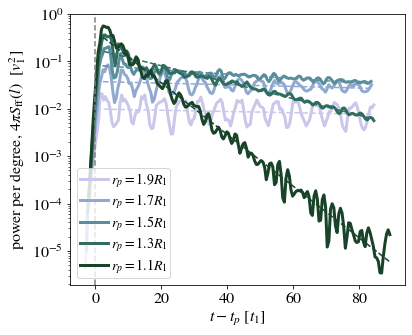

In [50]:
from astropy.modeling import models, fitting


bdl = [data_dir + "rp1.9/pa1e-8/",
       data_dir + "rp1.7/pa1e-8/",
       data_dir + "rp1.5/",
       data_dir + "rp1.3/",
       data_dir + "rp1.1/"]
rpl = [1.9,1.7,1.5,1.3,1.1]
pal = sns.cubehelix_palette(5,rot=0.5,start=1.8,light=0.8,dark=0.2)


gamma = []

plt.figure(figsize=(6,5))

for i,base_dir in enumerate(bdl):
    
    myr = 1.0
    spectime_data = dd.io.load(base_dir+"spectime_"+str(myr)+".hdf5")
    pt = get_pt(spectime_data)
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]
    plt.plot(pt['time']-tperi,pt['2'],color=pal[i],lw=3,ls='-',label=r"$r_p=$"+str(rpl[i])+"$R_1$" )
    
    # define a model for a line
    sel = pt['time']-tperi > 2
    xp = pt['time'][sel]-tperi
    yp = np.log(pt['2'][sel])
    fit = fitting.LinearLSQFitter()
    mi = models.Linear1D(intercept=np.interp(3,xp,yp),fixed={'intercept':False})
    m = fit(mi,xp,yp)
    #print(m)
    plt.plot(xp,np.exp(m(xp)),color=pal[i],ls='--' )
    gamma.append(-m.slope)

gamma = np.array(gamma)

plt.yscale('log')
#plt.xlim(-3.5,9)
plt.legend(loc='lower left',frameon=True)

plt.xlabel(r'$t-t_p \ [t_1]$')
plt.ylabel(r'power per degree, $4\pi S_{\rm ff}(l)$  $[v_1^2]$')

plt.axvline(0.0,color='grey',ls='--')
#plt.grid()

plt.savefig("prece_figures/power_l2_time.pdf",bbox_inches='tight',dpi=300)

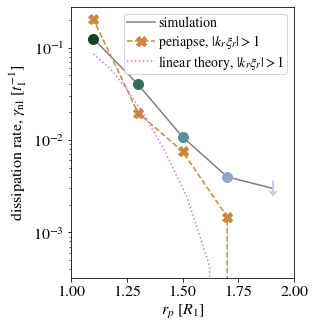

In [51]:
pal = sns.cubehelix_palette(5,rot=0.5,start=1.8,light=0.8,dark=0.2)
fig = plt.figure(figsize=(4,5))
rpla = np.array(rpl)

gamma_analytic_M1 = mp['omega'][0]/(2*np.pi)*matm_M1/mp['MMass'][0]
gamma_analytic_kx =  mp['omega'][0]/(2*np.pi)*mkx/mp['MMass'][0]
gamma_analytic_linear = mp['omega'][0]/(2*np.pi)*dEdL_lin['mkx']/mp['MMass'][0]

plt.plot(rpla,gamma,'-',color='0.5',label='simulation')

plt.plot(rpla,gamma_analytic_kx,'X--',color="Peru",label=r'periapse, $|k_r \xi_r| > 1$',markersize=10)

plt.plot(dEdL_lin['rp_o_rt']*q**(1/3.),gamma_analytic_linear,':',color="Orchid",label=r'linear theory, $|k_r \xi_r| > 1$',markersize=10)



for i,rp in enumerate(rpl):
    if rp<1.9:
        plt.plot(rpla[rpla==rp],gamma[rpla==rp],'o',color=pal[i],markersize=10)
    else:
        plt.plot(rpla[rpla==rp],gamma[rpla==rp],marker=r'$\downarrow$',color=pal[i],markersize=15)
        
plt.xlim(1,2)
plt.semilogy()
plt.xlabel('$r_p \ [R_1]$')
plt.ylabel(r'dissipation rate, $\gamma_{\rm nl}\ [t_{1}^{-1}]$')
plt.legend(frameon=True)


plt.savefig("prece_figures/gamma_diss.pdf",bbox_inches='tight',dpi=300)

In [49]:
def a_o_RL(q):
    """Eggelton formula, q=Ma/Md (opposite of eggelton deff) 
    this is: a/rL where a is separation and rL is the Roche Lobe radius (around the donor)"""
    return (0.6*q**(-2./3.) + np.log(1+q**(-1./3.)))/(0.49*q**(-2./3.))

a_o_RL(0.1)

1.729598900004333

In [52]:
bdl = [data_dir + "rp1.9/pa1e-8/",
       data_dir + "rp1.7/pa1e-8/",
       data_dir + "rp1.5/",
       data_dir + "rp1.3/",
       data_dir + "rp1.1/"]
rpl = [1.9,1.7,1.5,1.3,1.1]

dEdL_sim = []

for i,base_dir in enumerate(bdl):
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb[np.argmin(orb['sep'])]['time']
    #print("tperi=",tperi)
    
   # sel_late = orb['time']-tperi > 80
    sel_late = (orb['time']-tperi > 10) & (orb['time']-tperi < 20)  
    sel_early = (orb['time']>5) & (orb['time']-tperi < -5)
    
    dm = np.mean(orb['M_star'][sel_late])-np.mean(orb['M_star'][sel_early])
    #print(dm)
    
    Estar = orb['EK_star']+orb['EI_star']+orb['EPot_star']
    dEstar = np.mean(Estar[sel_late])-np.mean(Estar[sel_early])
    #print(dEstar)
    
    dLstar = np.mean(orb['Lz_star'][sel_late])-np.mean(orb['Lz_star'][sel_early])
    #print(dLstar)
    
    dEdL_sim.append([rpl[i]/0.1**(1/3.),dEstar,dLstar,dm,mkx.T[0][i]])
    
dEdL_sim = Table( np.array(dEdL_sim), names = ['rp_o_rt','dE','dL','dM','mkx'])

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


In [53]:
ascii.write(dEdL_sim,output='gyre/g135_mc01/dEdL_q01_v2.dat',overwrite=True)

[]

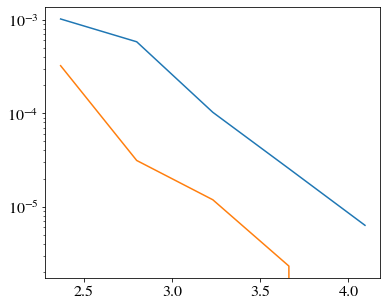

In [54]:
plt.plot(dEdL_sim['rp_o_rt'],dEdL_sim['dE'])
plt.plot(dEdL_sim['rp_o_rt'],dEdL_sim['mkx'])
plt.semilogy()

# $\gamma=\Gamma=5/3$, $q=0.1$ models

In [56]:
mp = ascii.read("gyre/g53_mc01/ModeProperties.txt")
p = ascii.read(data_dir+"g53/rp1.9/hse_profile.dat",names=['r','rho','p','m'])

wl2 = mp['omega'][0]
gamma_ad = 1.35
def kr0(r_initial):
    cs0 = np.interp(r_initial,p['r'], np.sqrt(gamma_ad*p['p']/p['rho']) )
    return wl2/cs0



bdl = [data_dir + "g53/rp2.1/",
       data_dir + "g53/rp1.9/",
       data_dir + "g53/rp1.7/",
       data_dir + "g53/rp1.5/",
       data_dir + "g53/rp1.3/",
       data_dir + "g53/rp1.1/"]
fl = ["EccSP.out1.00047.athdf",
      "EccSP.out1.00046.athdf",
      "EccSP.out1.00046.athdf",
      "EccSP.out1.00045.athdf",
      "EccSP.out1.00045.athdf",
      "EccSP.out1.00044.athdf"]




rpl = [1.9,1.7,1.5,1.3,1.1]

mkx = []
mkxsurf = []

for i,base_dir in enumerate(bdl):
    mylevel=0
    myfile = base_dir + fl[i]
    orb=ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb['time'][ np.argmin(orb['sep']) ]
    d = ou.read_data(myfile,orb,gamma=5./3.,level=mylevel,
                       x1_max=6,#x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'hse_profile.dat')
    
    print(d['Time']-tperi)
    sel = (d['r0']>0.9) & (d['gx2v']>0.1) & (d['gx2v']<np.pi-0.1) & (d['gx1v']>0.15)  #sel = d['r0']>0.5 # select material that is mostly stellar
    
   
    
    kx = kr0(d['r1'])*np.abs(d['gx1v']-d['r1'])
    mkxg1 = np.sum((d['r0']*d['rho']*d['dvol'])[sel & (kx>1)] )
    mkx.append([mkxg1])
    
    kxsurf = kr0(1.0)*np.abs(d['gx1v']-d['r1'])
    mkxsurfg1 = np.sum((d['r0']*d['rho']*d['dvol'])[sel & (kxsurf>1)] )
    mkxsurf.append([mkxsurfg1])
    

mkx = np.array(mkx)
mkxsurf = np.array(mkxsurf)

reading orbit file for binary simulation...
read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/wb_data/g53/rp2.1/EccSP.out1.00047.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
0.1999471661376937
reading orbit file for binary simulation...
read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/wb_data/g53/rp1.9/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
5.175781261357315e-07
reading orbit file for binary simulation...
read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/wb_data/g53/rp1.7/EccSP.out1.00046.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
0.3200124792480459
reading orbit file for binary simulation...
read_data...reading file /Volumes/DATAVolume2/athenaruns/EccPassage/wb_data/g53/rp1.5/EccSP.out1.00045.athdf
 ...file read, constructing arrays
 ...g

In [57]:
bdl = [data_dir + "g53/rp2.1/",
       data_dir + "g53/rp1.9/",
       data_dir + "g53/rp1.7/",
       data_dir + "g53/rp1.5/",
       data_dir + "g53/rp1.3/",
       data_dir + "g53/rp1.1/"]
rpl = [2.1,1.9,1.7,1.5,1.3,1.1]

dEdL_sim = []

for i,base_dir in enumerate(bdl):
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    tperi = orb[np.argmin(orb['sep'])]['time']
    #print("tperi=",tperi)
    
    sel_late = (orb['time']-tperi > 10) & (orb['time']-tperi < 20)  
    sel_early = (orb['time']>5) & (orb['time']-tperi < -5)
    
    dm = np.mean(orb['M_star'][sel_late])-np.mean(orb['M_star'][sel_early])
    #print(dm)
    
    Estar = orb['EK_star']+orb['EI_star']+orb['EPot_star']
    dEstar = np.mean(Estar[sel_late])-np.mean(Estar[sel_early])
    #print(dEstar)
    
    dLstar = np.mean(orb['Lz_star'][sel_late])-np.mean(orb['Lz_star'][sel_early])
    #print(dLstar)
    
    dEdL_sim.append([rpl[i]/0.1**(1/3.),dEstar,dLstar,dm,mkx.T[0][i]])
    
dEdL_sim = Table( np.array(dEdL_sim), names = ['rp_o_rt','dE','dL','dM','mkx'])

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...


In [58]:
ascii.write(dEdL_sim,output='gyre/g53_mc01/dEdL_q01.dat',overwrite=True)

[]

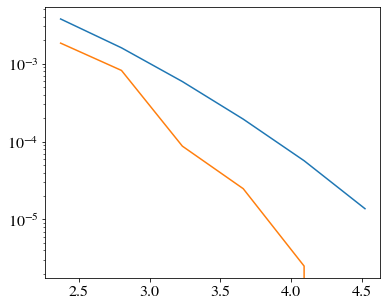

In [59]:
plt.plot(dEdL_sim['rp_o_rt'],dEdL_sim['dE'])
plt.plot(dEdL_sim['rp_o_rt'],dEdL_sim['mkx'])
plt.semilogy()

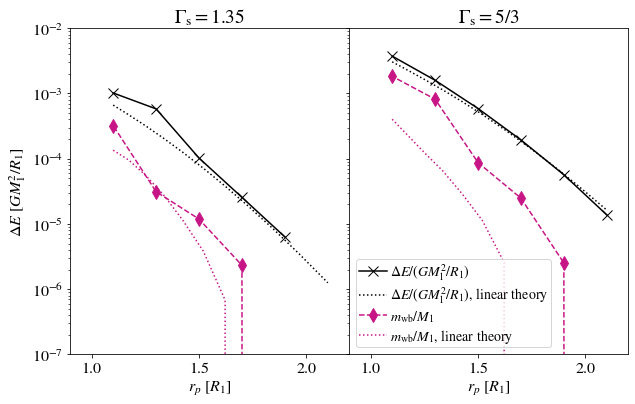

In [60]:
dEdLsim = ascii.read("gyre/g135_mc01/dEdL_q01_v2.dat")
dEdLsim53 = ascii.read("gyre/g53_mc01/dEdL_q01.dat")
dEdL = ascii.read("gyre/g135_mc01/dEdL.dat")
dEdL53 = ascii.read("gyre/g53_mc01/dEdL.dat")


q=0.1
rt = q**(1/3.)


c53 = 'SteelBlue'
c43 = 'DarkViolet'

plt.figure(figsize=(10,6))
plt.subplot(121)

plt.plot(dEdLsim['rp_o_rt']*rt,dEdLsim['dE'],
         'x-',markersize=10,
         color='k',
         label=r'$\Delta E / (GM_1^2/R_1)$')
plt.plot(dEdL['rp_o_rt']*rt,dEdL['dE'],label=r'$\Delta E / (GM_1^2/R_1)$, linear theory',ls=':',color='k')

plt.plot(dEdLsim['rp_o_rt']*rt,dEdLsim['mkx'],'d--',
         markersize=10,color='MediumVioletRed',label=r'$m_{\rm wb}/M_1$')
plt.plot(dEdL['rp_o_rt']*rt,dEdL['mkx'],label=r'$m_{\rm wb}/M_1$, linear theory',ls=':',color='MediumVioletRed')

plt.semilogy()
#plt.legend(loc='lower left')
plt.ylabel(r'$\Delta E \ [GM_1^2/R_1]$')
plt.xlabel(r'$r_p \ [R_1]$')
#plt.grid()
plt.xlim(0.9,2.2)
plt.ylim(1.e-7,1.e-2)
plt.title(r'$\Gamma_{\rm s}=1.35$')

plt.subplot(122)
plt.plot(dEdLsim53['rp_o_rt']*rt,dEdLsim53['dE'],'x-',markersize=10,
         color='k',
         label=r'$\Delta E / (GM_1^2/R_1)$')
plt.plot(dEdL53['rp_o_rt']*rt,dEdL53['dE'],label=r'$\Delta E / (GM_1^2/R_1)$, linear theory',ls=':',color='k')



plt.plot(dEdLsim53['rp_o_rt']*rt,dEdLsim53['mkx'],'d--',
          markersize=10,color='MediumVioletRed',label=r'$m_{\rm wb}/M_{\rm 1}$')
plt.plot(dEdL53['rp_o_rt']*rt,dEdL53['mkx'],label=r'$m_{\rm wb}/M_1$, linear theory',ls=':',color='MediumVioletRed')


plt.semilogy()
plt.legend()
#plt.ylabel(r'$\Delta E \ [GM_1^2/R_1]$')
plt.yticks(visible=False)
plt.xlabel(r'$r_p \ [R_1]$')
#plt.grid()
plt.xlim(0.9,2.2)
plt.ylim(1.e-7,1.e-2)
#plt.savefig('hj_figures/wb_mass_Eosc.pdf',bbox_inches='tight')
plt.title(r'$\Gamma_{\rm s}=5/3$')

plt.subplots_adjust(wspace=0)
plt.savefig("prece_figures/DeltaEMboth.pdf",bbox_inches='tight')

<ipython-input-61-2a9478713b08>:23: RuntimeWarning: overflow encountered in power
  plt.plot(xp,0.25*xp*np.exp( -(2.e-5/xp)**300 ) #np.where(xp>3.e-5,0.25*xp,np.nan)


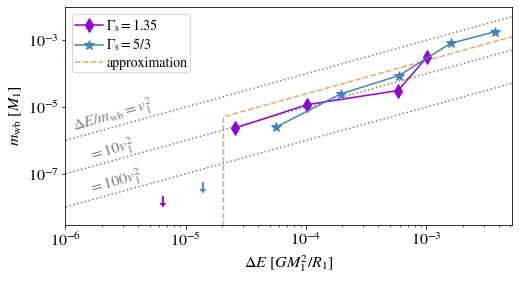

In [61]:
plt.figure(figsize=(8,4))

plt.plot(dEdLsim['dE'][1:],dEdLsim['mkx'][1:],'d-',
         color=c43,markersize=10,label=r'$\Gamma_{\rm s}=1.35$')
plt.plot(dEdLsim53['dE'][1:],dEdLsim53['mkx'][1:],'*-',
         color=c53,markersize=10,label=r'$\Gamma_{\rm s}=5/3$')
# 
plt.plot(dEdLsim['dE'][0],[1.5e-8],marker=r'$\downarrow$',markersize=10,color=c43)
plt.plot(dEdLsim53['dE'][0],[4.e-8],marker=r'$\downarrow$',markersize=10,color=c53)


plt.loglog()
plt.xlabel(r'$E_{\rm osc}$')
plt.xlim(1.e-6,)
plt.ylim(1.e-10,)
plt.ylabel(r'$m_{\rm wb} \ [M_1]$')
plt.xlabel(r'$\Delta E \ [GM_1^2/R_1]$')
#plt.savefig('hj_figures/wb_mass_Eosc.pdf',bbox_inches='tight')
#plt.axvline(dEdLsim['dE'][0])


xp = np.logspace(-6,-1,100)
plt.plot(xp,0.25*xp*np.exp( -(2.e-5/xp)**300 ) #np.where(xp>3.e-5,0.25*xp,np.nan) 
         ,zorder=0,color='SandyBrown',
        label='approximation',ls='--')



plt.plot(xp,xp,color='grey',ls=':',zorder=0)
plt.plot(xp,0.1*xp,color='grey',ls=':',zorder=0)
plt.plot(xp,0.01*xp,color='grey',ls=':',zorder=0)
plt.annotate(r'$\Delta E/m_{\rm wb} = v_1^2$',(1.1e-6,2.e-6),color='grey',rotation=16)
plt.annotate(r'$ = 10 v_1^2$',(1.5e-6,2.5e-7),color='grey',rotation=16)
plt.annotate(r'$ = 100 v_1^2$',(1.5e-6,2.5e-8),color='grey',rotation=16)

plt.ylim(3.e-9,1.e-2)



plt.legend(loc='upper left')
plt.savefig("prece_figures/MEboth.pdf",bbox_inches='tight')

reading orbit file for binary simulation...
tperi= 23.01004


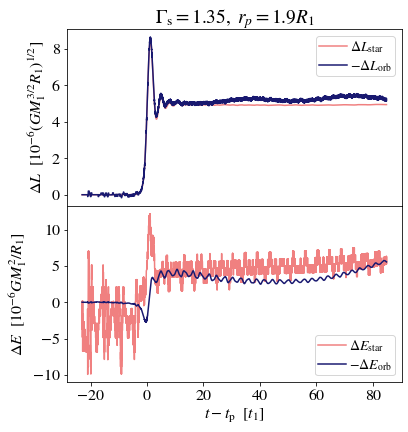

In [6]:
base_dir = data_dir+"rp1.9/pa1e-8/"

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat.gz") 

tperi = orb[np.argmin(orb['sep'])]['time']
print("tperi=",tperi)
et = (0.5*orb['M_star']*((orb['vxcom_star']-orb['vxcom'])**2 + (orb['vycom_star']-orb['vycom'])**2 + (orb['vzcom_star']-orb['vzcom'])**2)  + 
      0.5*orb['m2']*((orb['vx']-orb['vxcom'])**2 + (orb['vy']-orb['vycom'])**2 + (orb['vz']-orb['vzcom'])**2)  + 
      -orb['m2']*orb['M_star']/orb['sep'])
Estar = orb['EK_star']+orb['EI_star']+orb['EPot_star']


plt.figure(figsize=(6,6.5))
plt.subplot(211)
plt.plot(orb['time']-tperi,(orb['Lz_star']-orb['Lz_star'][0])/1.e-6,label=r'$\Delta L_{\rm star}$',color='LightCoral')
plt.plot(orb['time']-tperi,-(orb['Lz_orb']-orb['Lz_orb'][0] - orb['ltz']+orb['ltz'][0])/1.e-6,label=r'$-\Delta L_{\rm orb}$',color='MidnightBlue')
plt.ylabel(r'$\Delta L \ \ [10^{-6} (GM_1^{3/2} R_1)^{1/2}]$')
plt.xticks(visible=False)
plt.legend()

plt.title(r'$\Gamma_{\rm s}=1.35, \ r_p = 1.9 R_1$')

plt.subplot(212)
plt.plot(orb['time']-tperi,(Estar - Estar[0])/1.e-6,label=r'$\Delta E_{\rm star}$',color='LightCoral')
plt.plot(orb['time']-tperi,-(et-et[0])/1.e-6,label=r'$-\Delta E_{\rm orb}$',color='MidnightBlue')
plt.legend()
plt.ylabel(r'$\Delta E\ \ [10^{-6} GM_1^2/R_1]$')
plt.xlabel(r'$t-t_{\rm p} \ \ [t_1]$')
plt.subplots_adjust(hspace=0)

plt.savefig("prece_figures/EL_exchange.pdf",bbox_inches='tight')